<a href="https://colab.research.google.com/github/mehmetozturan/ML_ImageClassification/blob/main/ML_F%C4%B1nale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow


<BarContainer object of 4 artists>

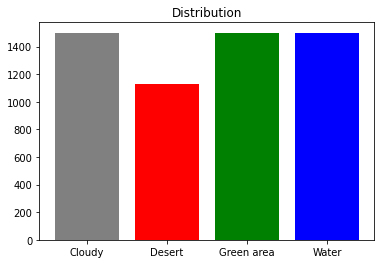

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import pickle
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np 
import cv2 
from tqdm import tqdm
from os import listdir

import matplotlib.pyplot as plt
x=['Cloudy','Desert','Green area','Water']
y=[1500,1131,1500,1500]
plt.title("Distribution")
plt.bar(x,y, color=['gray', 'red', 'green', 'blue'])

553476096/553467096 [==============================] - 3s 0us/step


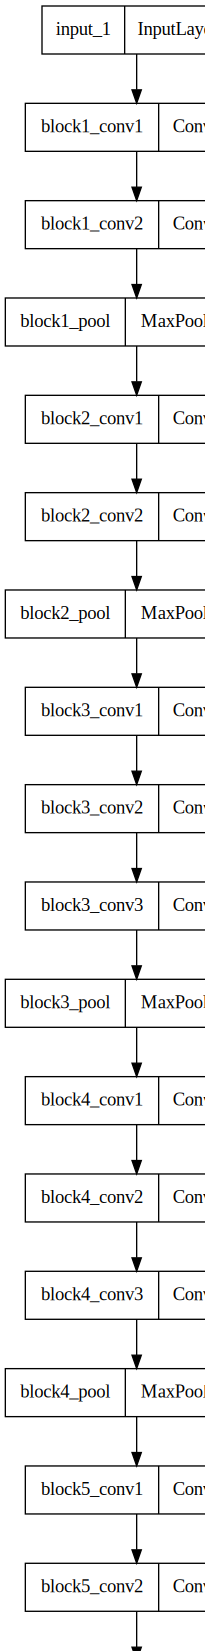

In [ ]:
saveDir = "./drive/MyDrive/model"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)


VGG_model =  tf.keras.applications.VGG16(include_top=True , weights='imagenet')
for models in VGG_model.layers:
  models.trainable= False

vgg_model = keras.Model(inputs=VGG_model.input, outputs=VGG_model.layers[-2].output)
# vgg_model.summary()

model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(4, activation='softmax'))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

tf.keras.utils.plot_model(model, to_file=os.path.join(saveDir, 'model.png'))
SVG(model_to_dot(model).create(prog='dot', format='svg'))



In [ ]:
def preprocess_img(img):
    # apply opencv preprocessing
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,  (224, 224)) 
    img = np.array(img, dtype=float)
    return img

def data_load():
  dataset ="./drive/MyDrive/data/"
  listing = listdir(dataset)
  
  files = ["cloudy/", "desert/", "green_area/", "water/"]

  data = []
  labels = []

  for file in tqdm(files):
    images = [img for img in listdir(dataset + file)]

    for image in images:
      img = cv2.imread(dataset + file + image)
      imag = preprocess_img(img)

      data.append(imag)
      labels.append(str(file))

  data = np.array(data, dtype="float32")
  labels = np.array(labels)
  classes = np.unique(labels)

  le = preprocessing.LabelEncoder()
  labels = le.fit_transform(labels)
  (trainX, testX, trainY, testY) = train_test_split(data,labels,test_size=0.33,shuffle=True)

  plt.imshow(np.array(testX[0]).astype("uint8"))
  print(classes[testY[0]])
  return trainX, testX, trainY, testY, classes


100%|██████████| 4/4 [00:34<00:00,  8.65s/it]


desert/
green_area/


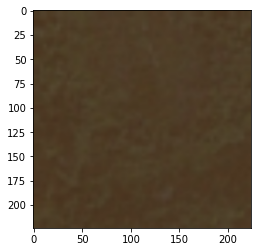

In [ ]:
x_train, x_test, y_train, y_test, classes = data_load()

# epochs = 50
# num_classes = len(np.unique(y_train))

# y_traincl = tf.keras.utils.to_categorical(y_train, num_classes, dtype =np.uint8)
# y_testcl = tf.keras.utils.to_categorical(y_test, num_classes, dtype =np.uint8)

plt.imshow(np.array(x_test[50]).astype("uint8"))
print(classes[y_test[50]])

In [ ]:
# opt = keras.optimizers.adam()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

history = model.fit(x_train, y_traincl,
                    epochs=50,
                    batch_size = 32,
                    validation_split=0.33,    
                    callbacks = [es])

score = model.evaluate(x_test, y_testcl, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
79/79 [==============================] - 40s 344ms/step - loss: 0.4435 - accuracy: 0.9296 - val_loss: 0.1765 - val_accuracy: 0.9743
Epoch 2/50
79/79 [==============================] - 20s 260ms/step - loss: 0.1678 - accuracy: 0.9727 - val_loss: 0.1399 - val_accuracy: 0.9847
Epoch 3/50
79/79 [==============================] - 20s 253ms/step - loss: 0.0591 - accuracy: 0.9873 - val_loss: 0.1412 - val_accuracy: 0.9767
Epoch 4/50
79/79 [==============================] - 19s 246ms/step - loss: 0.0811 - accuracy: 0.9842 - val_loss: 0.2417 - val_accuracy: 0.9743
Epoch 5/50
79/79 [==============================] - 20s 249ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0683 - val_accuracy: 0.9871
Epoch 6/50
79/79 [==============================] - 19s 247ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.0956 - val_accuracy: 0.9871
Epoch 7/50
79/79 [==============================] - 20s 252ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0575 - val_accuracy: 0.9896

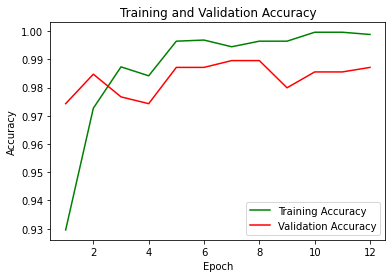

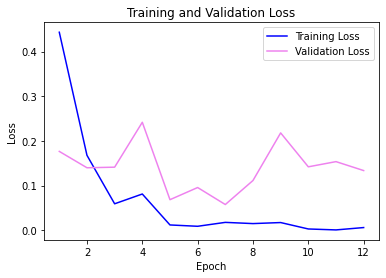

INFO:tensorflow:Assets written to: ./drive/MyDrive/model/assets


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='red', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='blue', label='Training Loss')
plt.plot(epochs, val_loss, color='violet', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

model.save(saveDir)

In [ ]:
Predictions=model.predict(x_test)


['water/', 'water/', 'water/', 'desert/', 'cloudy/', 'cloudy/', 'water/', 'green_area/', 'water/', 'water/', 'green_area/', 'green_area/', 'water/', 'green_area/', 'green_area/', 'desert/', 'desert/', 'desert/', 'cloudy/', 'desert/', 'cloudy/', 'green_area/', 'water/', 'cloudy/', 'desert/', 'water/', 'cloudy/', 'green_area/', 'green_area/', 'cloudy/', 'cloudy/', 'green_area/', 'water/', 'green_area/', 'water/', 'green_area/', 'green_area/', 'green_area/', 'water/', 'desert/', 'desert/', 'cloudy/', 'desert/', 'water/', 'water/', 'water/', 'cloudy/', 'water/', 'cloudy/', 'desert/', 'green_area/', 'water/', 'green_area/', 'cloudy/', 'water/', 'green_area/', 'water/', 'cloudy/', 'cloudy/', 'desert/', 'water/', 'cloudy/', 'water/', 'desert/', 'cloudy/', 'water/', 'desert/', 'green_area/', 'desert/', 'water/', 'green_area/', 'green_area/', 'green_area/', 'water/', 'green_area/', 'cloudy/', 'desert/', 'water/', 'water/', 'green_area/', 'desert/', 'water/', 'cloudy/', 'cloudy/', 'green_area/',

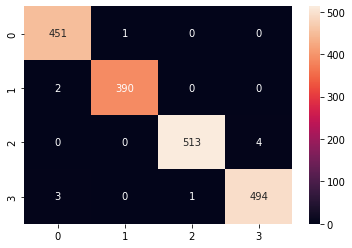

0.9940828402366864


In [ ]:
classo = np.argmax(Predictions, axis=1)

# print(classo)
y_pred = []

for label in classo:
  y_pred.append(classes[label])

print(y_pred)
y_t = []
for testy in y_test:
  y_t.append(classes[testy])

print(y_t)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

cm = confusion_matrix(y_t, y_pred)
sn.heatmap((cm), annot=True ,fmt='g')

plt.show()
print(accuracy_score(y_t, y_pred))

In [ ]:

#### GET CNN FEATURES ####
import keras
import tensorflow as tf

from keras.models import Model

model = keras.models.load_model("./drive/MyDrive/model")
new_model=Model(inputs=model.input,outputs=model.layers[18].output)


In [ ]:
x_train=new_model.predict(x_train)
x_test=new_model.predict(x_test)

In [ ]:
#normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(len(x_train[0]))


25088


In [ ]:
from urllib.request import ProxyBasicAuthHandler
from sklearn.decomposition import PCA 

PCA = PCA(n_components = 50)

X_train = x_train.copy()
X_test = x_test.copy()

X_train_lda = PCA.fit_transform(X=X_train, y=y_train)epochs = 50
num_classes = len(np.unique(y_train))

X_test_lda = PCA.transform(X_test)

print(PCA.explained_variance_ratio_)


[0.14101166 0.10275394 0.05338686 0.02667823 0.02163164 0.01556096
 0.01300553 0.01175963 0.01040065 0.01012275 0.00944138 0.00808322
 0.00760831 0.00732489 0.00671341 0.00632161 0.00577627 0.00542468
 0.00526252 0.00517219 0.00488883 0.00465681 0.00449298 0.00427506
 0.00422987 0.00407409 0.0038535  0.00385191 0.00367751 0.00358254
 0.00346483 0.00335334 0.00330593 0.0032485  0.00318287 0.00309593
 0.00295905 0.00293421 0.00291137 0.00284271 0.00283644 0.00274042
 0.00268883 0.0026657  0.00260833 0.00253628 0.00251308 0.00245493
 0.002397   0.00236076]


2 components represents:::  57.21239237487316
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


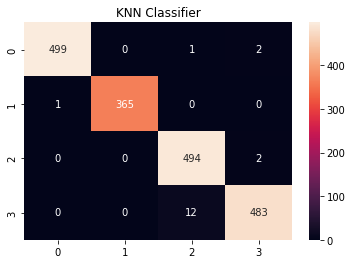

0.9903173749327595


In [ ]:
print("2 components represents::: ", sum(100*PCA.explained_variance_ratio_))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [5, 10, 30],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski','euclidean','manhattan'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(X_train_lda, y_train)

kclf = kgclf.best_estimator_
kclf.fit(X_train_lda, y_train)
knn_predict = kclf.predict(X_test_lda)

params = kclf.get_params()

print(params)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

cm_knn = confusion_matrix(y_test, knn_predict)
sn.heatmap((cm_knn), annot=True ,fmt='g')
plt.title("KNN Classifier")
plt.show()
print(accuracy_score(y_test, knn_predict))



[2 1 2 ... 3 1 0]


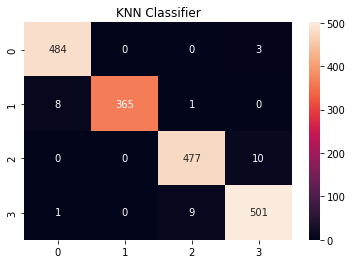

0.9827864443249059


In [ ]:
## KNN CLASSIFIER ##

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [1,3,5],
              "weights": ['uniform', 'distance']}

kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(x_train, y_train)

kclf = kgclf.best_estimator_
kclf.fit(x_train, y_train)


# knc=KNeighborsClassifier(n_neighbors = 3)
# knc.fit(x_train,y_train)
# knc.score(x_train,y_train)

# knn_predict=knc.predict(x_test)

knn_predict = kclf.predict(x_test)

print(knn_predict)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

cm_knn = confusion_matrix(y_test, knn_predict)
sn.heatmap((cm_knn), annot=True ,fmt='g')
plt.title("KNN Classifier")
plt.show()
print(accuracy_score(y_test, knn_predict))


In [ ]:
print(kclf)

KNeighborsClassifier(n_neighbors=3, weights='distance')


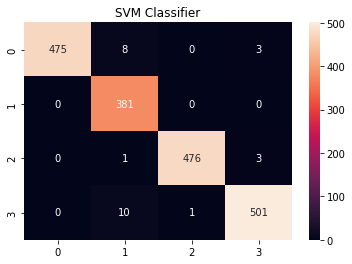

0.986013986013986
SVC()


In [ ]:
#### SVM ###

from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
import numpy as np

# parameters = {"C": [1,3],
#              "gamma": ["auto", "scale"]}

# clf = RandomizedSearchCV(SVC(), parameters)
svmclf = SVC()
# clf.fit(x_train, y_train)

# svmclf = clf.best_estimator_
svmclf.fit(x_train, y_train)

svm_pred = svmclf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


cm_svm = confusion_matrix(y_test, svm_pred)
sn.heatmap((cm_svm), annot=True ,fmt='g')
plt.title("SVM Classifier")
plt.show()
print(accuracy_score(y_test, svm_pred))
print(svmclf)


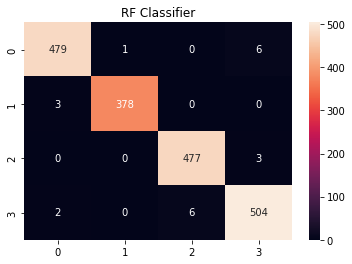

0.9887036040882194


In [ ]:
### RANDOM FOREST ###

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
import numpy as np

max_depth = [3, None]
max_features = [1, 3, 10]
min_samples_split = [1.0, 3, 10]
min_samples_leaf = [1, 3, 10]
bootstrap = [True, False]
criterion = ["gini", "entropy"]
n_estimators = [10, 20]


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 3, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rclf = RandomForestClassifier()
# rgclf = RandomizedSearchCV(rclf, param_grid=random_grid)
# rgclf.fit(x_train, y_train)

# rclf = rgclf.best_estimator_
rclf.fit(x_train, y_train)

rf_pred = rclf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


cm_rf = confusion_matrix(y_test, rf_pred)
sn.heatmap((cm_rf), annot=True ,fmt='g')
plt.title("RF Classifier")
plt.show()
print(accuracy_score(y_test, rf_pred))



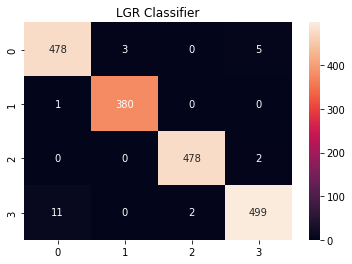

0.9870898332436794


In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(x_train, y_train)

lg_pred = lg.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


cm_lg = confusion_matrix(y_test, lg_pred)
sn.heatmap((cm_lg), annot=True ,fmt='g')
plt.title("LGR Classifier")
plt.show()
print(accuracy_score(y_test, lg_pred))



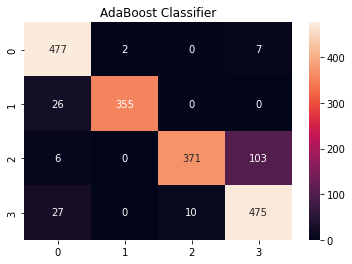

0.9026358257127488


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100)
abc.fit(x_train, y_train)

abc_pred = abc.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


cm_abc = confusion_matrix(y_test, abc_pred)
sn.heatmap((cm_abc), annot=True ,fmt='g')
plt.title("AdaBoost Classifier")
plt.show()
print(accuracy_score(y_test, abc_pred))

